In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [3]:
plt.style.use(u'ggplot')
plt.rcParams['figure.figsize'] = (10,6)
ppp.init()

Loaded 1921 thermo species
Loaded 1030 propellants


## Rocket Performance
*Finally* we are at the fun stuff.  The next section shows a basic rocket performance example.

In [9]:
p = ppp.FrozenPerformance()
o2 = ppp.PROPELLANTS['OXYGEN (LIQUID)']
ch4 = ppp.PROPELLANTS['METHANE']
p.add_propellants([(ch4, 1.0), (o2, 1.0)])
p.set_state(P=10, Pe=0.01)
print p

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	METHANE - 1.000 mol
	OXYGEN (LIQUID) - 1.000 mol
======= Chamber =======: 
	Pressure: 10.000 atm 
	Temperature: 2549.8 K 
	Enthalpy: -2047.491 kJ/kg 
	Int. Energy: -3376.014 kJ/kg 
	Gibbs Free Energy: -39958.401 kJ/kg 
	Entropy: 14.868 kJ/kg-K 
	Molar Mass: 15.958 g/mol 
	dV_P: -1.000
	dV_T: 1.000
	Cp: 2.675 kJ/kg-K
	Cv: 2.154 kJ/kg-K
	gamma: 1.242
	Sound Speed: 1270.2 m/s
	
	Ae/At: 0.00000
	A/dotm: 0.00000 m/s/atm
	C*: 0.00000 m/s
	Cf: 0.00000
	Ivac (m/s): 0.00000
	Isp (m/s): 0.00000
	Isp/g (s): 0.00000
======= Throat =======: 
	Pressure: 5.552 atm 
	Temperature: 2271.2 K 
	Enthalpy: -2785.802 kJ/kg 
	Int. Energy: -3969.178 kJ/kg 
	Gibbs Free Energy: -35858.463 kJ/kg 
	Entropy: 14.562 kJ/kg-K 
	Molar Mass: 15.958 g/mol 
	dV_P: -1.000
	dV_T: 1.000
	Cp: 2.623 kJ/kg-K
	Cv: 2.102 kJ/kg-K
	gamma: 1.248
	Sound Speed: 1215.2 m/s
	
	Ae/At: 1.00000
	A/dotm: 175.39810 m/s/atm
	C*: 1753.9

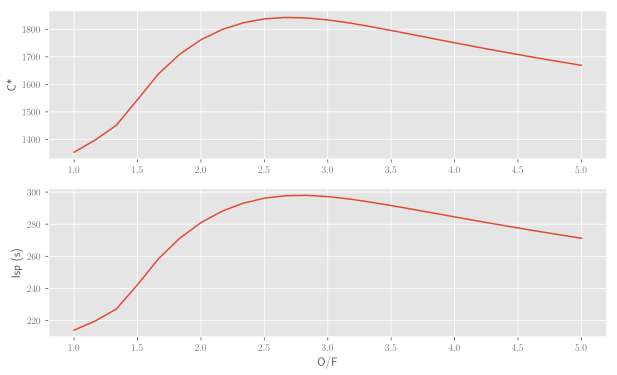

In [10]:
OF = np.linspace(1, 5, 25)
N_CH4 = 1.0 / ch4.mw
cstar = []
Isp = []
for i in xrange(len(OF)):
    p = ppp.FrozenPerformance()
    N_O2 = OF[i] / o2.mw
    p.add_propellants([(ch4, N_CH4), (o2, N_O2)])
    p.set_state(P=1000./14.7, Pe=1)
    cstar.append(p.performance.cstar)
    Isp.append(p.performance.Isp/9.8)

ax = plt.subplot(211)
ax.plot(OF, cstar)
ax.set_ylabel('C*')
ax1 = plt.subplot(212, sharex=ax)
ax1.plot(OF, Isp)
ax1.set_ylabel('Isp (s)')
plt.xlabel('O/F')